Made on 5/1/2023 by Zain Eris Kamal

I modified the GRS class so that it takes care of downloading/storing/accessing the most recent data with minimal complexity. 

This means that any user only needs the GRS.py file and its dependencies (DataDownloader.py and Utils.py). They don't need to worry about downloading the data themselves or structuring their project repository a certain way.

---

This notebook is a proof of concept for that functionality.

In [1]:
def getPath(*args):
    """Join all arguments into a single path. Use 'current' as a stand in for path to current file."""
    import os
    args = [os.getcwd() if arg == 'current' else arg for arg in args]
    return os.path.abspath(os.path.join(*args))

    
def path_addSrc(fullpath_src = None, relpath_src = None, parent = False, verbose = False):
    """
    Add directory "src/" to path.
        
    PARAMETERS:
        fullpath_src : string
            Path to source from root.
        relpath_src : string
            Path to source from directory of current file.
        parent : boolean
            Use parent folder as source
        verbose : boolean
            Prints source directory path.
    
    RETURN:
        path_src : string
            Path to source from root.
    """
    
    import sys
    import os

    if fullpath_src:
        path_src = getPath(fullpath_src)
    elif relpath_src:
        path_src = getPath('current', relpath_src)
    elif parent:
        path_src = getPath('current', '..')
        
    if verbose: print("Path to source: " + path_src)
    
    sys.path.append(path_src)
    return path_src


path_src = path_addSrc(parent=True, verbose=True)

Path to source: C:\Users\Eris\Documents\sync_local\01_Research\Mars_Magnetics\code\05_mag_src_map\src


In [2]:
from lib.GRS import GRS as GRS_class
from lib.Utils import Utils as utils

In [3]:
GRS = GRS_class()

In [4]:
path__datahome = utils.getPath('current','..','data','1_raw')

GRS.downloadData(path__datahome, overwrite=False, verbose=True)

Data folder already exists at 
C:\Users\Eris\Documents\sync_local\01_Research\Mars_Magnetics\code\05_mag_src_map\src\data\1_raw\GRS. 
To overwrite, add `overwrite=True` param.



In [5]:
GRS.loadData()

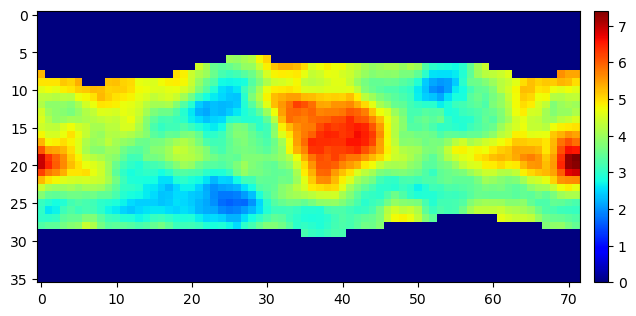

In [6]:
GRS.visualize('h2o')